In [1]:
import pandas as pd

df = pd.read_csv('data/BTC-Daily.csv')

In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


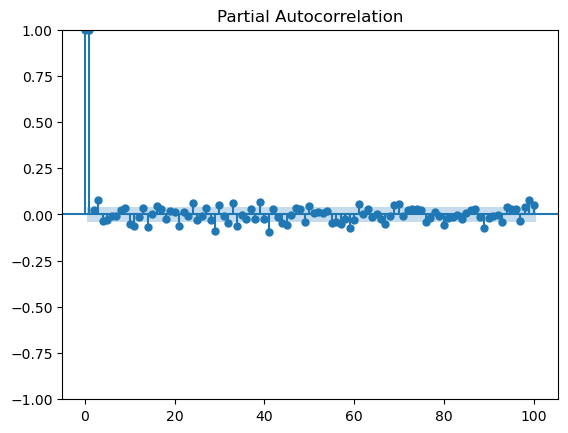

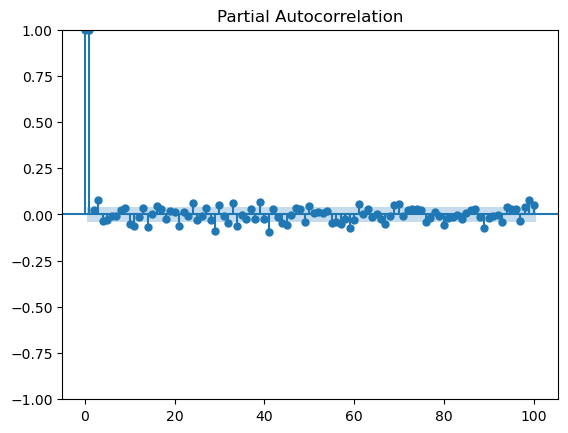

In [10]:
# plot the partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['close'], lags=100)

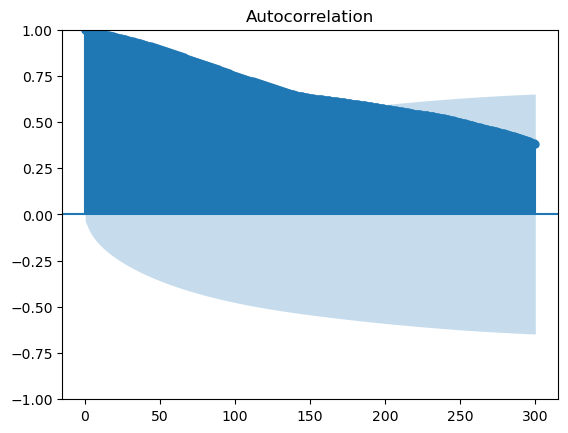

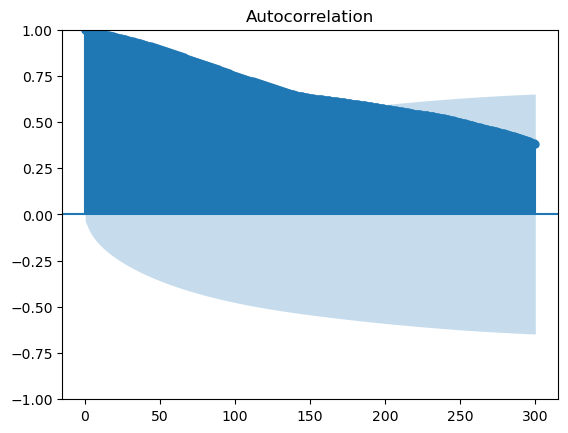

In [14]:
# plot the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['close'], lags=300)

In [20]:
# Fit an ARIMA(100, 2) model to the first 80% of the data
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['close'][:int(len(df)*0.8)], order=(100, 2, 0))
model_fit = model.fit()

# Make predictions for the remaining 20% of the data
predictions = model_fit.predict(len(df['close'][:int(len(df)*0.8)]), len(df['close'])-1, typ='levels')

# Plot the predictions for the next 20% against the true values
import matplotlib.pyplot as plt
plt.plot(df['close'][int(len(df)*0.8):])
plt.plot(predictions, color='red')
plt.show()